In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Walmart DataSet.csv to Walmart DataSet (2).csv


In [3]:
walmart_data = pd.read_csv('Walmart DataSet.csv')

In [4]:
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [36]:
walmart_data.isnull().sum()    # theres no null values

# Drop duplicates if any
walmart_data.drop_duplicates(inplace=True)

In [6]:
walmart_data.duplicated().sum()

0

In [7]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [37]:
# Convert 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

# display descriptive statistics
walmart_data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [11]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


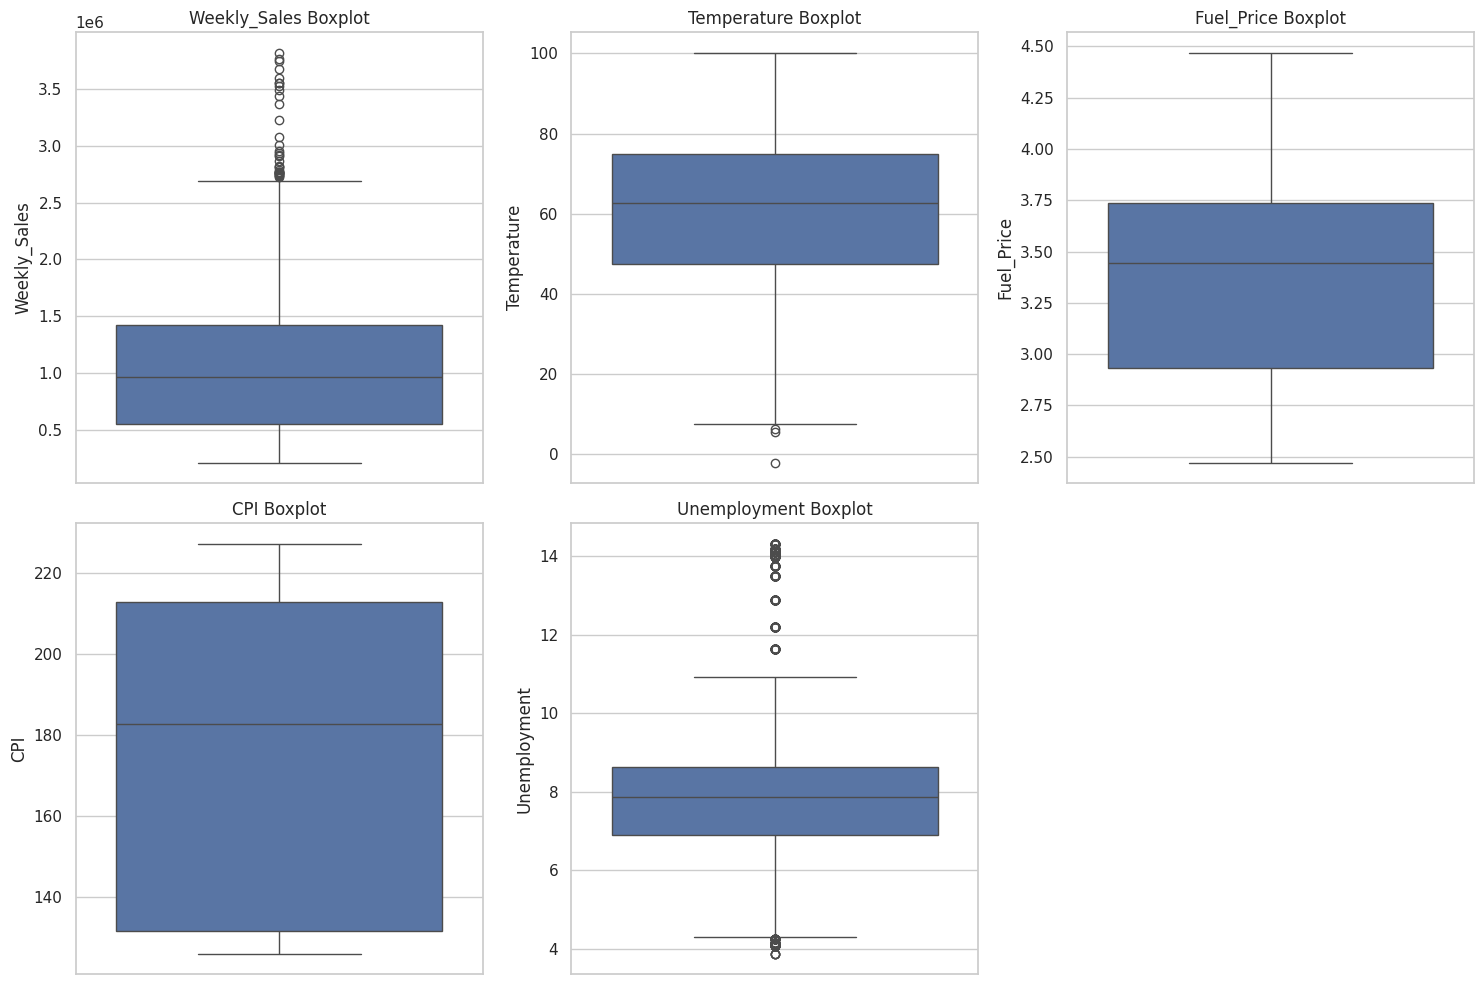

In [35]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create boxplots for numerical columns
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=walmart_data[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

In [38]:
# handling outliers

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from numerical columns making copy of walmart_data
cleaned_data = walmart_data.copy()
for col in numerical_cols:
    cleaned_data = remove_outliers(cleaned_data, col)

# Display the number of rows removed
rows_removed = walmart_data.shape[0] - cleaned_data.shape[0]
rows_removed, cleaned_data.shape

(518, (5917, 8))

##Exploratory Data Analysis (EDA)

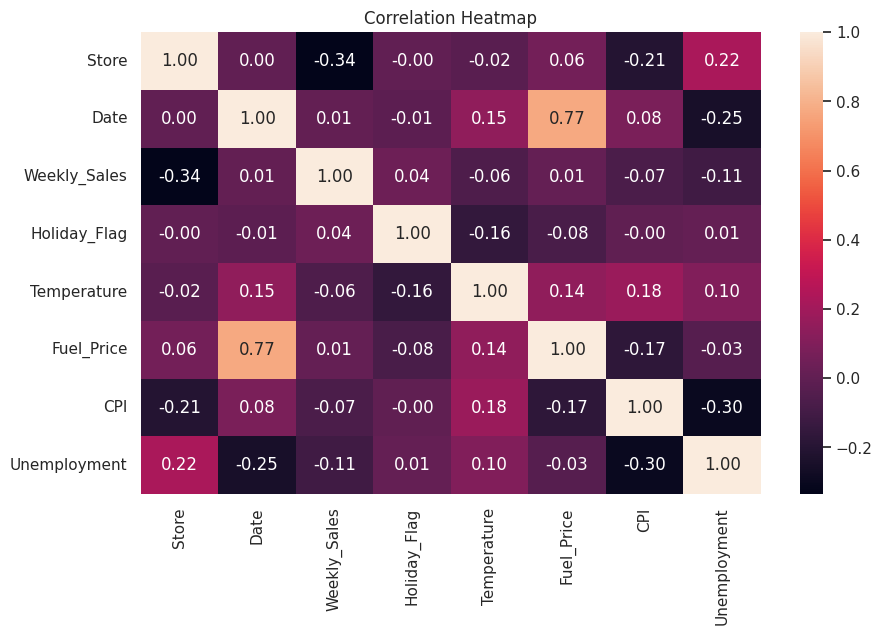

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(walmart_data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Correlation Insights:**

 **Weekly Sales Correlation:**
Negatively correlated with Unemployment.
Slight positive correlation with CPI and Fuel Price.

**Temperature:** Minimal correlation with Weekly Sales.

**CPI and Unemployment:** Correlated, indicating possible economic influences on sales.

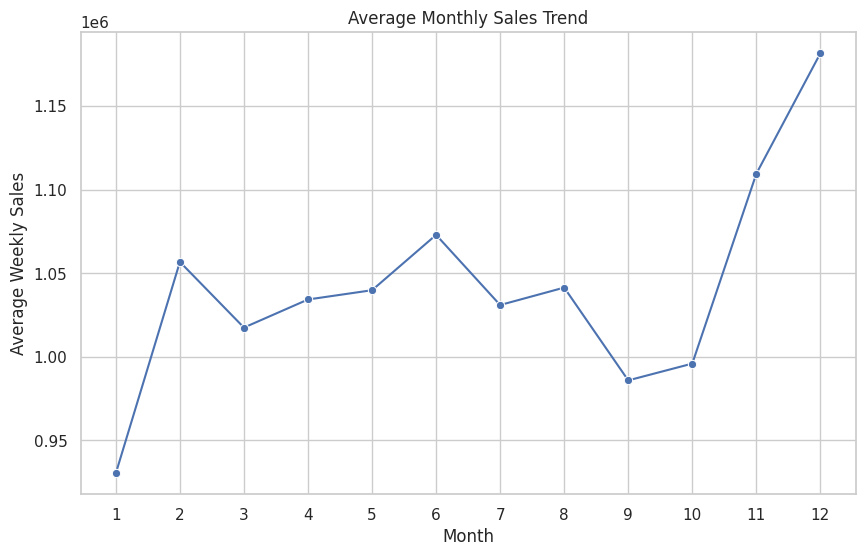

monthly_sales Month
1     9.303755e+05
2     1.056891e+06
3     1.017574e+06
4     1.034394e+06
5     1.039951e+06
6     1.073075e+06
7     1.031086e+06
8     1.041519e+06
9     9.859676e+05
10    9.960250e+05
11    1.109696e+06
12    1.181804e+06
Name: Weekly_Sales, dtype: float64
top_performing_stores Store
20    2.058998e+06
4     2.038739e+06
14    1.986529e+06
13    1.957682e+06
2     1.905830e+06
Name: Weekly_Sales, dtype: float64
worst_performing_stores Store
33    259861.692028
44    302748.866014
5     318011.810490
36    373511.992797
3     402704.441049
Name: Weekly_Sales, dtype: float64


In [40]:
#e investigating seasonal trends and top-performing stores

# Extracting the month and year for seasonal analysis
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Year'] = cleaned_data['Date'].dt.year

# Average monthly sales to check for seasonal trends
monthly_sales = cleaned_data.groupby('Month')['Weekly_Sales'].mean()

# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Average Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13))
plt.show()

# Identifying top-performing stores based on average weekly sales
top_performing_stores = cleaned_data.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(5)

# Identifying worst-performing stores
worst_performing_stores = cleaned_data.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=True).head(5)

print("monthly_sales", monthly_sales)
print( "top_performing_stores",top_performing_stores)
print("worst_performing_stores",worst_performing_stores)

##Model Building

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to prepare time series data and forecast using ARIMA
def forecast_arima(store_id, weeks=12):
    # Filter data for the given store
    store_data = cleaned_data[cleaned_data['Store'] == store_id].copy()
    store_data.set_index('Date', inplace=True)
    store_data = store_data.resample('W').sum()  # Resample weekly

    # Train-test split
    train_size = int(len(store_data) * 0.8)
    train, test = store_data[:train_size], store_data[train_size:]

    # ARIMA model fitting
    model = ARIMA(train['Weekly_Sales'], order=(5,1,0))  # ARIMA(5,1,0) for initial testing
    fitted_model = model.fit()

    # Forecasting
    forecast = fitted_model.forecast(steps=weeks)

    # Calculating RMSE for performance check
    test_forecast = fitted_model.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], test_forecast))

    return forecast, rmse

# Running ARIMA forecasting for the top 5 stores
forecast_results = {}
for store_id in top_performing_stores.index:
    forecast, rmse = forecast_arima(store_id)
    forecast_results[store_id] = (forecast, rmse)

forecast_results

{20: (2012-04-15    2.253164e+06
  2012-04-22    2.183232e+06
  2012-04-29    2.243808e+06
  2012-05-06    2.340665e+06
  2012-05-13    2.244152e+06
  2012-05-20    2.248232e+06
  2012-05-27    2.269799e+06
  2012-06-03    2.282629e+06
  2012-06-10    2.256623e+06
  2012-06-17    2.263850e+06
  2012-06-24    2.268980e+06
  2012-07-01    2.269272e+06
  Freq: W-SUN, Name: predicted_mean, dtype: float64,
  209312.1761204768),
 4: (2012-01-08    1.423946e+06
  2012-01-15    3.187088e+05
  2012-01-22    9.267846e+05
  2012-01-29    1.490341e+06
  2012-02-05    9.770835e+05
  2012-02-12    7.391392e+05
  2012-02-19    1.116509e+06
  2012-02-26    1.180808e+06
  2012-03-04    9.283010e+05
  2012-03-11    9.451714e+05
  2012-03-18    1.100493e+06
  2012-03-25    1.054560e+06
  Freq: W-SUN, Name: predicted_mean, dtype: float64,
  1174124.9225148624),
 14: (2012-04-15    2.046890e+06
  2012-04-22    1.951343e+06
  2012-04-29    2.075925e+06
  2012-05-06    2.093203e+06
  2012-05-13    2.084615e+

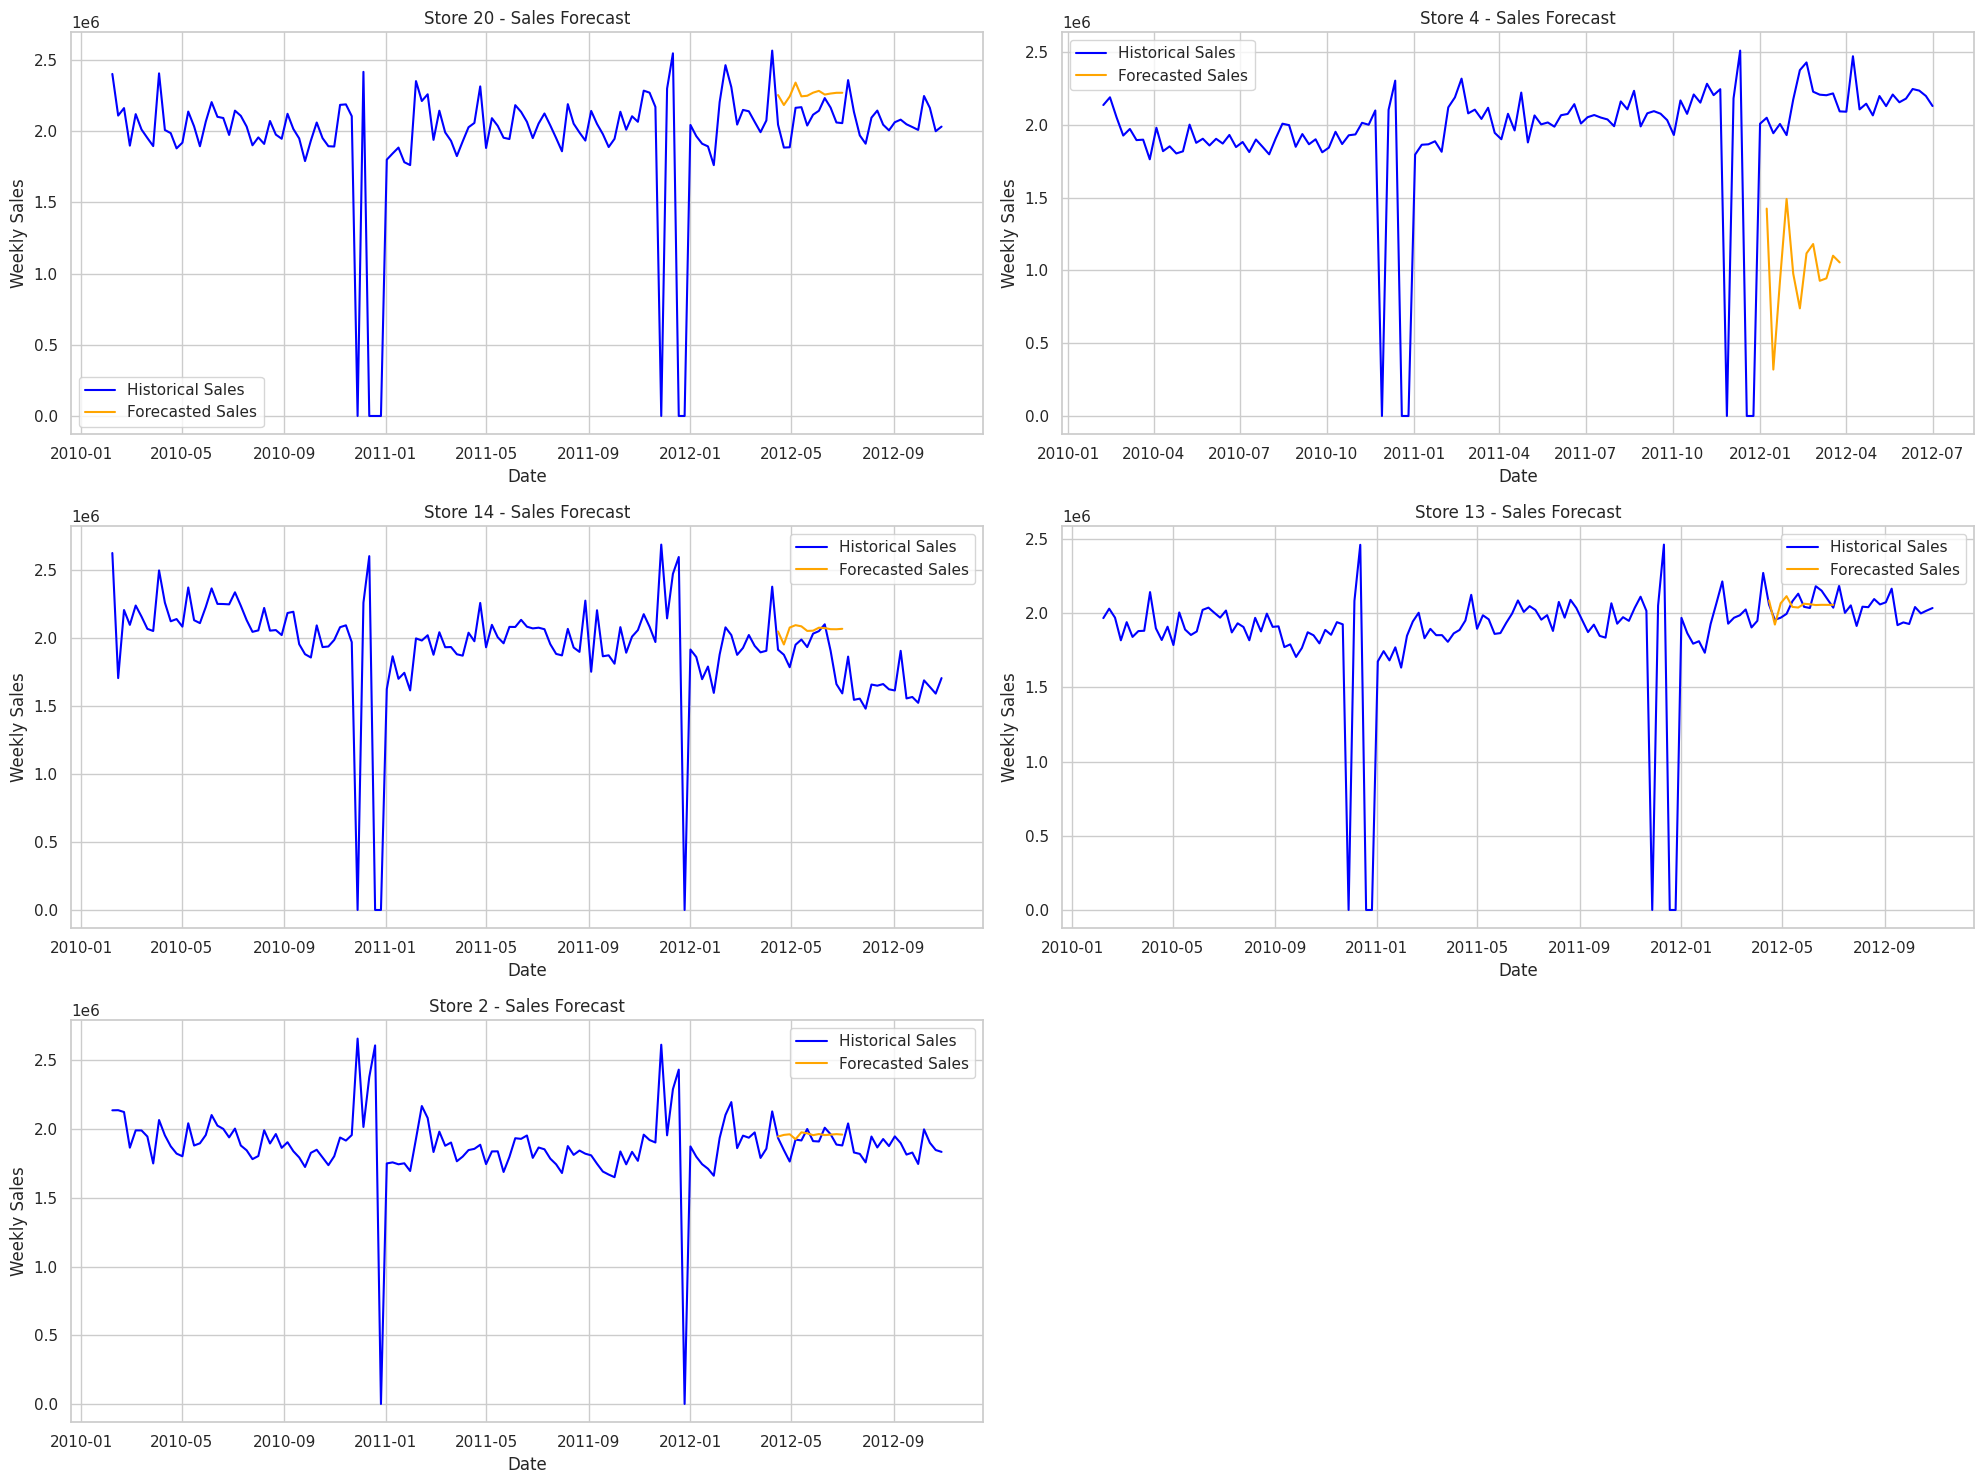

In [42]:
# Plotting forecast results for each of the top 5 stores
plt.figure(figsize=(20, 15))

for i, store_id in enumerate(top_performing_stores.index, 1):
    forecast, _ = forecast_results[store_id]
    store_data = cleaned_data[cleaned_data['Store'] == store_id].copy()
    store_data.set_index('Date', inplace=True)
    store_data = store_data.resample('W').sum()

    plt.subplot(3, 2, i)
    plt.plot(store_data['Weekly_Sales'], label='Historical Sales', color='blue')
    plt.plot(forecast, label='Forecasted Sales', color='orange')
    plt.title(f'Store {store_id} - Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()

plt.tight_layout()
plt.show()


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to perform SARIMA forecasting
def forecast_sarima(store_id, weeks=12):
    # Filter data for the given store
    store_data = cleaned_data[cleaned_data['Store'] == store_id].copy()
    store_data.set_index('Date', inplace=True)
    store_data = store_data.resample('W').sum()

    # Train-test split
    train_size = int(len(store_data) * 0.8)
    train, test = store_data[:train_size], store_data[train_size:]

    # SARIMA model fitting
    model = SARIMAX(train['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))
    fitted_model = model.fit(disp=False)

    # Forecasting
    forecast = fitted_model.forecast(steps=weeks)

    # Calculating RMSE for performance check
    test_forecast = fitted_model.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], test_forecast))

    return forecast, rmse

# Running SARIMA forecasting for the top 5 stores
sarima_forecast_results = {}
for store_id in top_performing_stores.index:
    forecast, rmse = forecast_sarima(store_id)
    sarima_forecast_results[store_id] = (forecast, rmse)

sarima_forecast_results


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

{20: (2012-04-15    2.315934e+06
  2012-04-22    2.445899e+06
  2012-04-29    2.169121e+06
  2012-05-06    2.339699e+06
  2012-05-13    2.288013e+06
  2012-05-20    2.211674e+06
  2012-05-27    2.233029e+06
  2012-06-03    2.409751e+06
  2012-06-10    2.362710e+06
  2012-06-17    2.315820e+06
  2012-06-24    2.222528e+06
  2012-07-01    2.316161e+06
  Freq: W-SUN, Name: predicted_mean, dtype: float64,
  227678.33009173922),
 4: (2012-01-08    2.068946e+06
  2012-01-15    2.068066e+06
  2012-01-22    2.088840e+06
  2012-01-29    2.011717e+06
  2012-02-05    2.190600e+06
  2012-02-12    2.260177e+06
  2012-02-19    2.406783e+06
  2012-02-26    2.161019e+06
  2012-03-04    2.184958e+06
  2012-03-11    2.122337e+06
  2012-03-18    2.203870e+06
  2012-03-25    2.029338e+06
  Freq: W-SUN, Name: predicted_mean, dtype: float64,
  99789.62723197982),
 14: (2012-04-15    1.932581e+06
  2012-04-22    2.173900e+06
  2012-04-29    1.978714e+06
  2012-05-06    2.205832e+06
  2012-05-13    2.041389e+